# OLA3
### Gruppe H (Caroline og Maria)

In [1]:
import os, cv2

import tensorflow as tf
import keras

import numpy as np
import pandas as pd
import random
from random import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from tqdm import tqdm

In [2]:
# TF Version
tf.__version__

'2.16.1'

## Image

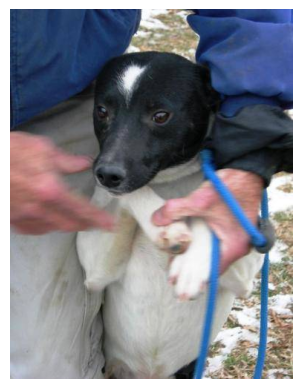

In [3]:
image_path = "Data/CNN/test/1.jpg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

## Data Ingestion

In [4]:
train_dir = './Data/CNN/train'
test_dir = './Data/CNN/test'

In [5]:
train_img_list = os.listdir(train_dir)
test_img_list = os.listdir(test_dir)

In [6]:
shuffle(train_img_list)
shuffle(test_img_list)

In [7]:
print('Train size: %d. Test size: %d' % (len(train_img_list), len(test_img_list)))

Train size: 5533. Test size: 12500


In [8]:
def cat_dog_1HO(label):
    return [1, 0] if label == 'cat' else [0, 1]

In [9]:
def load_images_and_labels(dir, img_list, img_size=(224,224)):
    images = []
    labels = []
    for filename in tqdm(img_list):
        img = cv2.imread(os.path.join(dir, filename))
        img = cv2.resize(img, img_size)
        images.append(img)
        
        label_str = filename.split('.')[0]
        label = cat_dog_1HO(label_str)
        labels.append(label)
    return np.array(images), np.array(labels)

In [10]:
x_train, y_train = load_images_and_labels(train_dir, train_img_list)

100%|██████████| 5533/5533 [00:13<00:00, 409.03it/s]


In [11]:
def get_label_from_1HO(enc_label):
    return 'cat' if enc_label[0] == 1 else 'dog'

### Visualize Data

In [12]:
def display_pic(num):
    image = x_train[num]
    enc_label = y_train[num]
    label = get_label_from_1HO(enc_label)
    plt.title('Example: %d  Label: %s' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.axis('off')
    plt.show()

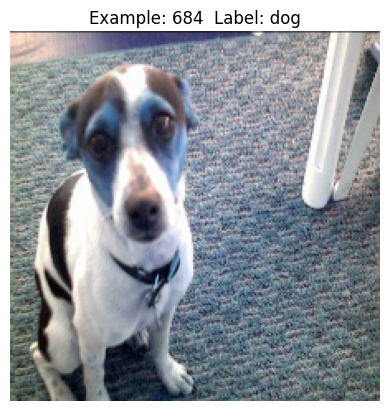

In [13]:
randnum = random.randint(0, 5533)
display_pic(randnum)